In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 10.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [2]:
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob

In [3]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [ ]:
#response = client.search_recent_tweets("saquarema", max_results=100)

In [ ]:
#print(response.meta)

In [ ]:
#tweets = response.data

In [ ]:
#type(tweets)

list

In [ ]:
#for tweet in tweets:
 #   print(tweet)
   # print(tweet.text)
    #print(tweet.)
    #print(tweet.

In [4]:
results = []
resultid = []
resulttext = []

In [ ]:
type(results)

list

In [ ]:
#results.clear()
#resultid.clear()
#resulttext.clear()


In [5]:
df2 = pd.DataFrame(columns=['ID', 'text','sentiment'])

In [6]:
public_tweets = tweepy.Paginator(client.search_recent_tweets, query='saquarema', 
                              max_results=100).flatten(limit=1000)

In [7]:
analysis = None

In [8]:
count = 0
for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  polarity = analysis.sentiment.polarity
  if polarity > 0:
       sentimento = 'positivo'
  elif polarity == 0:
       sentimento = 'neutro'
  else:
       sentimento = 'negativo'

  df2.loc[count] = [tweet.id]+[tweet.text]+[sentimento]
  
  count += 1

In [9]:
df2

,ID,text,sentiment
0,1635424597888872448,Tô só essa viagenzinha pra Saquarema,neutro
1,1635419193586913288,RT @SGOurgente: Obras de contenção e drenagem ...,neutro
2,1635415894250917889,Obras de contenção e drenagem na serra que lig...,neutro
3,1635414813336829959,Saudade de Saquarema,neutro
4,1635410231466545152,Tô muito pra cima com negão aqui em Saquarema ...,neutro
...,...,...,...
757,1632900495470739456,"Todo dia meu pai manda foto em Saquarema, nas ...",neutro
758,1632899681633071104,@zainlikethat Amiga kkkkkk vai ficar igual o d...,neutro
759,1632898495882354688,os alternativo estranho de Saquarema be like: ...,neutro
760,1632897702487900162,em saquarema não há pessoas para mim,neutro


In [10]:
!pip install nltk
import nltk
#nltk.download()  <-- Run this if it's your first time using nltk to download all of the datasets and models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
df2.head()

,ID,text,sentiment
0,1635424597888872448,Tô só essa viagenzinha pra Saquarema,neutro
1,1635419193586913288,RT @SGOurgente: Obras de contenção e drenagem ...,neutro
2,1635415894250917889,Obras de contenção e drenagem na serra que lig...,neutro
3,1635414813336829959,Saudade de Saquarema,neutro
4,1635410231466545152,Tô muito pra cima com negão aqui em Saquarema ...,neutro


In [12]:
df2.iloc[4]

ID                                         1635410231466545152
text         Tô muito pra cima com negão aqui em Saquarema ...
sentiment                                               neutro
Name: 4, dtype: object

In [13]:
df2.iloc[1,1]

'RT @SGOurgente: Obras de contenção e drenagem na serra que liga Maricá e Saquarema avançam: Primeira fase de obras na Serra do Mato Grosso…'

In [14]:
import re

In [15]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

In [16]:
df2.head()

,ID,text,sentiment
0,1635424597888872448,tô só essa viagenzinha pra saquarema,neutro
1,1635419193586913288,rt @sgourgente: obras de contenção e drenagem ...,neutro
2,1635415894250917889,obras de contenção e drenagem na serra que lig...,neutro
3,1635414813336829959,saudade de saquarema,neutro
4,1635410231466545152,tô muito pra cima com negão aqui em saquarema ...,neutro


In [17]:
# Essa expressão regular remove toda a pontuação
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

df2.head()

,ID,text,sentiment
0,1635424597888872448,tô só essa viagenzinha pra saquarema,neutro
1,1635419193586913288,rt sgourgente obras de contenção e drenagem ...,neutro
2,1635415894250917889,obras de contenção e drenagem na serra que lig...,neutro
3,1635414813336829959,saudade de saquarema,neutro
4,1635410231466545152,tô muito pra cima com negão aqui em saquarema ...,neutro


In [18]:
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,ID,text,sentiment,tokens
0,1635424597888872448,tô só essa viagenzinha pra saquarema,neutro,"[tô, só, essa, viagenzinha, pra, saquarema]"
1,1635419193586913288,rt sgourgente obras de contenção e drenagem ...,neutro,"[rt, sgourgente, obras, de, contenção, e, dren..."
2,1635415894250917889,obras de contenção e drenagem na serra que lig...,neutro,"[obras, de, contenção, e, drenagem, na, serra,..."
3,1635414813336829959,saudade de saquarema,neutro,"[saudade, de, saquarema]"
4,1635410231466545152,tô muito pra cima com negão aqui em saquarema ...,neutro,"[tô, muito, pra, cima, com, negão, aqui, em, s..."


In [20]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['tô',
 'só',
 'essa',
 'viagenzinha',
 'pra',
 'saquarema',
 'rt',
 'sgourgente',
 'obras',
 'de']

In [21]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(729, 'saquarema'),
 (472, 'de'),
 (389, 'em'),
 (286, 'o'),
 (244, 't'),
 (244, 'https'),
 (244, 'co'),
 (227, 'e'),
 (206, 'a'),
 (197, 'que')]

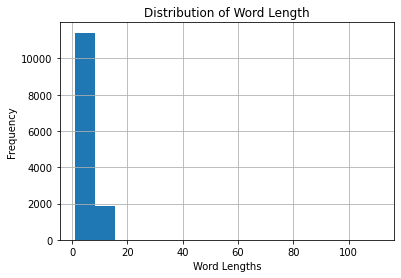

In [22]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [23]:
word_counts[:10]

[(729, 'saquarema'),
 (472, 'de'),
 (389, 'em'),
 (286, 'o'),
 (244, 't'),
 (244, 'https'),
 (244, 'co'),
 (227, 'e'),
 (206, 'a'),
 (197, 'que')]

In [24]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('co')
stop_words.append('t')
stop_words.append('https')
stop_words.append('rt')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,text,sentiment,tokens,tokens_stop
0,1635424597888872448,tô só essa viagenzinha pra saquarema,neutro,"[tô, só, essa, viagenzinha, pra, saquarema]","[tô, viagenzinha, pra, saquarema]"
1,1635419193586913288,rt sgourgente obras de contenção e drenagem ...,neutro,"[rt, sgourgente, obras, de, contenção, e, dren...","[sgourgente, obras, contenção, drenagem, serra..."
2,1635415894250917889,obras de contenção e drenagem na serra que lig...,neutro,"[obras, de, contenção, e, drenagem, na, serra,...","[obras, contenção, drenagem, serra, liga, mari..."
3,1635414813336829959,saudade de saquarema,neutro,"[saudade, de, saquarema]","[saudade, saquarema]"
4,1635410231466545152,tô muito pra cima com negão aqui em saquarema ...,neutro,"[tô, muito, pra, cima, com, negão, aqui, em, s...","[tô, pra, cima, negão, aqui, saquarema, kkk, 🤪]"


In [25]:
word_list_stop = sum(df2.tokens_stop.tolist(), [])

In [26]:
word_list_stop[:10]

['tô',
 'viagenzinha',
 'pra',
 'saquarema',
 'sgourgente',
 'obras',
 'contenção',
 'drenagem',
 'serra',
 'liga']

In [27]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,ID,text,sentiment,tokens,tokens_stop,tokens_pos
0,1635424597888872448,tô só essa viagenzinha pra saquarema,neutro,"[tô, só, essa, viagenzinha, pra, saquarema]","[tô, viagenzinha, pra, saquarema]","[(tô, NN), (viagenzinha, NN), (pra, NN), (saqu..."
1,1635419193586913288,rt sgourgente obras de contenção e drenagem ...,neutro,"[rt, sgourgente, obras, de, contenção, e, dren...","[sgourgente, obras, contenção, drenagem, serra...","[(sgourgente, NN), (obras, NNS), (contenção, V..."
2,1635415894250917889,obras de contenção e drenagem na serra que lig...,neutro,"[obras, de, contenção, e, drenagem, na, serra,...","[obras, contenção, drenagem, serra, liga, mari...","[(obras, NNS), (contenção, VBP), (drenagem, JJ..."
3,1635414813336829959,saudade de saquarema,neutro,"[saudade, de, saquarema]","[saudade, saquarema]","[(saudade, NN), (saquarema, NN)]"
4,1635410231466545152,tô muito pra cima com negão aqui em saquarema ...,neutro,"[tô, muito, pra, cima, com, negão, aqui, em, s...","[tô, pra, cima, negão, aqui, saquarema, kkk, 🤪]","[(tô, NN), (pra, NN), (cima, NN), (negão, JJ),..."


In [28]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('portuguese')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

df2['tokens_stem'] = df2.tokens_stop.apply(stem_lambda)
df2.head()

,ID,text,sentiment,tokens,tokens_stop,tokens_pos,tokens_stem
0,1635424597888872448,tô só essa viagenzinha pra saquarema,neutro,"[tô, só, essa, viagenzinha, pra, saquarema]","[tô, viagenzinha, pra, saquarema]","[(tô, NN), (viagenzinha, NN), (pra, NN), (saqu...","[tô, viagenzinh, pra, saquarem]"
1,1635419193586913288,rt sgourgente obras de contenção e drenagem ...,neutro,"[rt, sgourgente, obras, de, contenção, e, dren...","[sgourgente, obras, contenção, drenagem, serra...","[(sgourgente, NN), (obras, NNS), (contenção, V...","[sgourgent, obras, contençã, drenag, serr, lig..."
2,1635415894250917889,obras de contenção e drenagem na serra que lig...,neutro,"[obras, de, contenção, e, drenagem, na, serra,...","[obras, contenção, drenagem, serra, liga, mari...","[(obras, NNS), (contenção, VBP), (drenagem, JJ...","[obras, contençã, drenag, serr, lig, maric, sa..."
3,1635414813336829959,saudade de saquarema,neutro,"[saudade, de, saquarema]","[saudade, saquarema]","[(saudade, NN), (saquarema, NN)]","[saudad, saquarem]"
4,1635410231466545152,tô muito pra cima com negão aqui em saquarema ...,neutro,"[tô, muito, pra, cima, com, negão, aqui, em, s...","[tô, pra, cima, negão, aqui, saquarema, kkk, 🤪]","[(tô, NN), (pra, NN), (cima, NN), (negão, JJ),...","[tô, pra, cim, negã, aqu, saquarem, kkk, 🤪]"


In [29]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df2.tokens_stem.tolist(), [])

word_list_clean[:10]


['tô',
 'viagenzinh',
 'pra',
 'saquarem',
 'sgourgent',
 'obras',
 'contençã',
 'drenag',
 'serr',
 'lig']

In [30]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores (usando o stop)
word_counts_stop = Counter(word_list_stop)
a = word_counts_stop

# Inverta a chave / valores no dicionário para classificar
word_counts_stop = list(zip(word_counts_stop.values(), word_counts_stop.keys()))

# Classifique a lista por contagem
word_counts_stop = sorted(word_counts_stop, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_stop[:10]

[(729, 'saquarema'),
 (146, 'pra'),
 (104, 'boavista'),
 (80, 'hoje'),
 (53, '…'),
 (51, 'aqui'),
 (49, 'rj'),
 (48, 'desde'),
 (47, 'centralbotafogo'),
 (47, 'apaixonado')]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


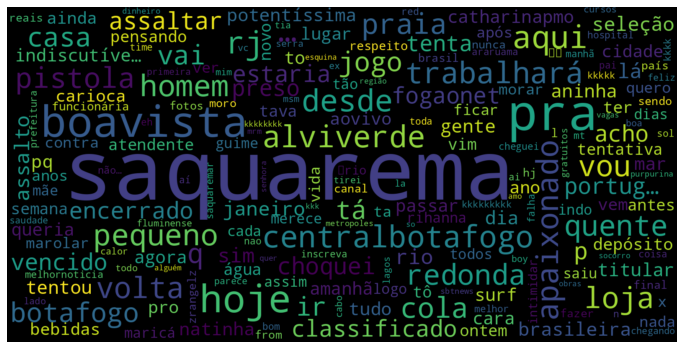

In [31]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_stop
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(737, 'saquarem'),
 (190, 'pra'),
 (104, 'boavist'),
 (80, 'hoj'),
 (65, 'volt'),
 (58, 'assalt'),
 (55, 'trabalh'),
 (53, '…'),
 (51, 'jog'),
 (51, 'aqu')]

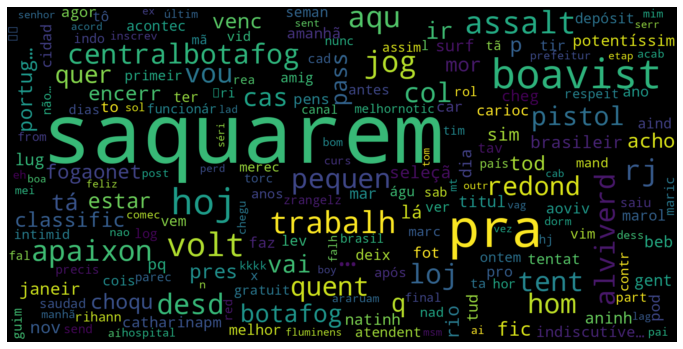

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
comentarios = df2["text"].values
comentarios

array(['tô só essa viagenzinha pra saquarema',
       'rt  sgourgente  obras de contenção e drenagem na serra que liga maricá e saquarema avançam  primeira fase de obras na serra do mato grosso…',
       'obras de contenção e drenagem na serra que liga maricá e saquarema avançam  primeira fase de obras na serra do mato grosso deve ser entregue em até   dias  e teve investimento de cerca de   milhões de reais https   t co azfwowrtlc',
       'saudade de saquarema',
       'tô muito pra cima com negão aqui em saquarema kkk 🤪',
       'a jojo em saquarema kdndjsndj',
       'qria mt ter   anos e estat em saquarema ahora com as minhas amigas vivian e klautau 💔',
       'quero muito ir pra saquarema',
       'nesta segunda feira        termina o prazo de inscrição para as   vagas abertas para cursos gratuitos de educação inclusiva ofertadas por saquarema  na região dos lagos do rio  errejotanoticias\nsaiba mais  https   t co  ',
       'meu deeeeus aqui em saquarema só tem velho e bolsonari

In [35]:
classes = df2["sentiment"].values
classes

array(['neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'positivo', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'positivo', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'positivo',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro',

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from google.colab                    import drive
from nltk.corpus                     import stopwords

In [37]:
vectorizer = CountVectorizer(analyzer = "word")
freq_comentarios = vectorizer.fit_transform(comentarios)
modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

#  Tenho que alterar para negativo, positivo e neutro

MultinomialNB()

In [42]:
teste_modelo = ['assaltar']
freq_testes = vectorizer.transform(teste_modelo)
modelo.predict(freq_testes)

array(['neutro'], dtype='<U8')

In [43]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


array(['neutro', 'positivo', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'positivo', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'positivo', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'positivo', 'neutro',
       'positivo', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neut

In [44]:
metrics.accuracy_score(classes, resultados)

0.926509186351706

In [60]:
sentimentos = ["positivo","neutro","negativo"]

In [62]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    negativo       0.00      0.00      0.00         5
      neutro       0.98      0.82      0.89       714
    positivo       0.22      0.81      0.34        43

    accuracy                           0.82       762
   macro avg       0.40      0.55      0.41       762
weighted avg       0.93      0.82      0.86       762



In [49]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   negativo  neutro  positivo  All
Real                                     
negativo         0       4         1    5
neutro           1     682        31  714
positivo         0      19        24   43
All              1     705        56  762


In [65]:
#usando melhoria com Bigrams
vectorizer = CountVectorizer(ngram_range = (1, 3))
freq_comentarios = vectorizer.fit_transform(comentarios)

modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

MultinomialNB()

In [66]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


array(['neutro', 'positivo', 'positivo', 'neutro', 'neutro', 'neutro',
       'positivo', 'neutro', 'neutro', 'neutro', 'positivo', 'positivo',
       'positivo', 'positivo', 'positivo', 'positivo', 'positivo',
       'neutro', 'positivo', 'positivo', 'neutro', 'neutro', 'neutro',
       'positivo', 'neutro', 'positivo', 'positivo', 'neutro', 'positivo',
       'neutro', 'neutro', 'neutro', 'neutro', 'positivo', 'positivo',
       'neutro', 'neutro', 'positivo', 'neutro', 'positivo', 'neutro',
       'positivo', 'neutro', 'positivo', 'neutro', 'positivo', 'neutro',
       'positivo', 'positivo', 'neutro', 'neutro', 'positivo', 'positivo',
       'neutro', 'neutro', 'neutro', 'neutro', 'positivo', 'neutro',
       'neutro', 'positivo', 'neutro', 'positivo', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'positivo', 'neutro',
       'neutro', 'neutro', 'positivo', 'neutro', 'positivo', 'positivo',
       'positivo', 'positivo', 'neutro', 'positivo', 'neutro', 'neutro'

In [67]:
metrics.accuracy_score(classes, resultados)

0.6706036745406824

In [68]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    negativo       0.00      0.00      0.00         5
      neutro       0.99      0.66      0.79       714
    positivo       0.14      0.88      0.24        43

    accuracy                           0.67       762
   macro avg       0.37      0.52      0.34       762
weighted avg       0.93      0.67      0.76       762



 Modelo Com Randow Forest

In [69]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [70]:
train_data_features = vectorizer.fit_transform(comentarios)
train_data_features

<762x2466 sparse matrix of type '<class 'numpy.int64'>'
	with 7349 stored elements in Compressed Sparse Row format>

In [71]:
forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier()

In [75]:
class_sentimentos = df2["sentiment"].values
class_sentimentos

array(['neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'positivo', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'positivo', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'positivo',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro',

In [76]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier()

In [77]:
test_data_features_resultados = vectorizer.transform(comentarios)
test_data_features_resultados

<762x2466 sparse matrix of type '<class 'numpy.int64'>'
	with 7349 stored elements in Compressed Sparse Row format>

In [78]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'positivo', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'positivo', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'positivo',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro',
       'neutro', 'neutro', 'neutro', 'neutro', 'neutro',

In [79]:
metrics.accuracy_score(classes, resultados)

1.0

In [82]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         5
      neutro       1.00      1.00      1.00       714
    positivo       1.00      1.00      1.00        43

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



In [83]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   negativo  neutro  positivo  All
Real                                     
negativo         5       0         0    5
neutro           0     714         0  714
positivo         0       0        43   43
All              5     714        43  762
